# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Exploratory Data Analysis

## 2.1 Reading and preparing the data

In [5]:
df = pd.read_csv('dataset/data.csv')

In [6]:
len(df)

11914

In [7]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


replacing all spaces in columns names and values with underscore <br>
lowercase all letters

In [8]:
df.columns = (df.columns
                  .str.lower()
                  .str.replace(' ', '_'))

In [9]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [10]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = (df[col]
                   .str.lower()
                   .str.replace(' ', '_'))

In [11]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650


columns: <br>
- make: make of a car (BMW, Toyota, and so on)
- model: model of a car
- year: year when the car was manufactured
- engine_fuel_type: type of fuel the engine needs (diesel, electric, and so on)
- engine_hp: horsepower of the engine
- engine_cylinders: number of cylinders in the engine
- transmission_type: type of transmission (automatic or manual)
- driven_wheels: front, rear, all
- number_of_doors: number of doors a car has
- market_category: luxury, crossover, and so on
- vehicle_size: compact, midsize, or large
- vehicle_style: sedan or convertible
- highway_mpg: miles per gallon (mpg) on the highway
- city_mpg: miles per gallon in the city
- popularity: number of times the car was mentioned in a Twitter stream
- msrp: manufacturer’s suggested retail price


**msrp : target variable**

## 2.2 Target variable analysis

y distribution: what the possible values of y can be and how often they occur.

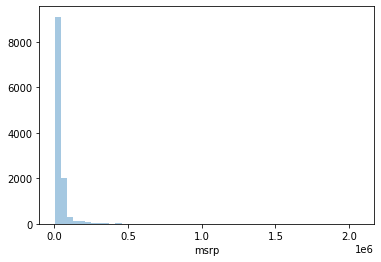

In [17]:
sns.distplot(df.msrp, kde=False)

Distribution prices has a very long tail. <br>
There are many cars with low prices, but the number quickly drops and there is a long tail of very few cars with high prices.

The long tail makes it quite difficult to see the distribution. <br>
Let's zooming and look at the distribution of the cars' prices are below $100,000

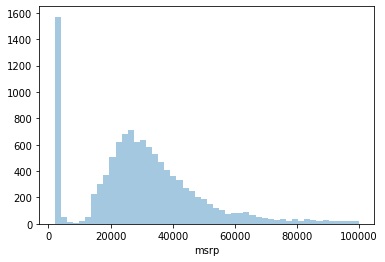

In [20]:
sns.distplot(df.msrp[df.msrp < 100000], kde=False)

The head of the df distribution is better. But we can see that there are a lot of cars that cost $1,000.

### Using log function to have a closely normal distribution on car prices

**Observation:** <br>
A non-normal distribution can affect the model in a bad way. <br>
One way to solve this problem is log transformation -> applying the log function on the feature, it removes the undesired effect. <br>
<br>
*ynew = log(y+1)* <br>
+1 is important in cases that have zeros. The log(0) is -infinity, but the log(1) is zero. If our values are all non-negative, by adding 1, we make sure that the transformed values don't go below zero.

In [21]:
log_price = np.log1p(df.msrp)

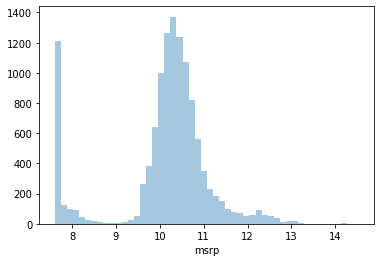

In [24]:
sns.distplot(log_price, kde=False)

This transformation removes the long tail, the curve looks more like a bell-shaped curve. It's not a normal distribution, but the model can deal with it more easily compared with the original data (df.msrp).

## 2.3 Checking for missing values

In [25]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

We will deal with these missing values later. It's important to notice that msrp (the target) doesn't have missing values.

## 2.4 Validation framework

splitting data into validation, test and training (20%, 20%, and 60%, respectively)

In [47]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

# fixing the random seed to make sure that every time we run(shuffle) it the results are the same
np.random.seed(2)
# creating array with indices and shuffling it
idx = np.arange(n)
np.random.shuffle(idx)

# iloc: access the df by its indexes
df_shuffled = df.iloc[idx]

# spliting the shuffled dataframe
# if the len dataset is 100. df_train: 0-60
df_train = df_shuffled.iloc[:n_train].copy()
# df_val: 60-(60+20)
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
# df_test: (60+20)-100
df_test = df_shuffled.iloc[n_train+n_val:].copy()

understanding the code above

In [44]:
# every time we run it, the result will be different

idx = np.arange(5)
print('before shuffle', idx)
np.random.shuffle(idx)
print('after shuffle', idx)

before shuffle [0 1 2 3 4]
after shuffle [1 2 0 4 3]


In [45]:
# every time we run it, the result will be the same

np.random.seed(2)
idx = np.arange(5)
print('before shuffle', idx)
np.random.shuffle(idx)
print('after shuffle', idx)

before shuffle [0 1 2 3 4]
after shuffle [2 4 1 3 0]


seeing dataframes

In [52]:
df_shuffled.head()
# df_train.head()
# df_val.head()
# df_test.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


As we saw, the dataframe has a long tail in the prices distribution. To remove its effect, we will use the log transformation.

In [53]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

remove the target variable from the dataframes. we shouldn't use them.

In [54]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# 3. Machine Learning for regression